In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold,train_test_split
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.metrics import log_loss

/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [447]:
!ls *.csv

Haar_Data.csv                    gestures_data_2D.csv
Haar_Data_3D.csv                 gestures_data_3D+Haar.csv
Haar_Data_3D_only.csv            gestures_data_3D.csv
gestures_data.csv                gestures_data_3d_haar_no_g.csv
gestures_data_2D+Haar.csv        gestures_data_3d_no_g.csv
gestures_data_2D+Haar_minus3.csv


In [448]:
#df = pd.read_csv('gestures_data_3D.csv',index_col=0)
#df = pd.read_csv('gestures_data_2D.csv',index_col=0)
#df = pd.read_csv('gestures_data_3d_haar_no_g.csv',index_col=0)
#df = pd.read_csv('gestures_data_3d_no_g.csv',index_col=0)
#df = pd.read_csv('gestures_data_2D+Haar.csv',index_col=0)
#df = pd.read_csv('gestures_data_2D+Haar_minus3.csv',index_col=0)
df = pd.read_csv('gestures_data_3D+Haar.csv',index_col=0)
df.head(2)

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
0,1,U01,gestures-dataset/U01/01/01.txt,14.210,1.490,4.377,-0.291,4.668,1,2,1,2,-1.396,0.762,-4.472,5.234,1,2,1,1,9.849,10.383,9.237,1.146,1,2,0,0,-0.147,0.549,-0.890,1.439,1,2,2,2,0.836,2.143,0.094,2.049,1,2,0,0,7.779,11.353,0.358,10.995,0,0,0,0,40.369,94.484,0.743,93.741,0,0,0,0,-0.210,1.141,-1.569,2.710,1,2,2,2,-0.123,1.502,-2.093,3.595,2,2,2,2,-0.133,0.288,-0.922,1.211,1,2,1,1,-0.043,2.845,-1.823,4.668,1,2,0,1,-0.477,1.681,-3.553,5.234,1,2,1,2,-0.264,0.270,-0.877,1.146,1,2,0,1,4.272,9.039,-0.463,9.502,0,1,1,1,-2.603,3.747,-6.890,10.638,1,2,0,1,-1.510,0.573,-3.209,3.782,0,1,1,1,30.440,54.619,-0.362,54.982,0,0,1,0,-3.756,10.447,-30.563,41.009,0,1,0,1,-4.793,1.378,-17.957,19.335,0,1,0,1,2.688,5.427,5.395,1.487,-0.154,-0.521,-0.698,0.795,0.86,0.024,-0.583,0.806,-3.537,-5.756,-2.244,-0.711,0.271,1.533,-0.568,-0.813,14.451,14.525,13.476,13.178,13.824,-0.148,0.158,0.269,-0.115,-0.152
1,1,U01,gestures-dataset/U01/01/02.txt,14.242,1.057,3.992,-3.051,7.043,1,2,0,1,-1.381,1.081,-4.462,5.543,1,1,2,1,9.941,10.344,9.455,0.889,1,2,0,0,0.011,0.537,-0.601,1.138,1,2,1,2,0.842,1.925,0.057,1.869,1,2,0,0,7.112,11.663,0.232,11.431,0,0,0,0,34.435,86.033,0.529,85.504,0,0,0,0,-0.406,1.028,-3.061,4.089,1,2,1,2,0.122,2.133,-2.041,4.175,2,2,2,1,-0.034,0.333,-0.766,1.099,1,1,1,2,0.291,3.226,-3.817,7.043,1,2,0,1,-0.768,1.694,-3.849,5.543,1,1,1,1,0.135,0.537,-0.351,0.889,1,2,1,2,8.273,12.548,0.226,12.321,0,1,0,0,-5.198,3.017,-12.599,15.616,1,1,1,1,1.439,2.453,0.154,2.299,1,1,0,0,48.704,103.474,0.590,102.884,0,0,0,0,-13.233,7.970,-62.085,70.055,0,1,0,1,8.294,17.451,0.352,17.100,0,0,0,0,1.785,4.733,5.094,1.857,0.125,-0.700,-0.663,0.551,0.83,0.045,-0.312,0.842,-2.847,-6.249,-4.028,-0.550,0.166,1.488,-0.061,-0.728,14.056,14

In [449]:
#if limiting to looking only at certain gestures
#df = df[df['label']<=12]
#df = df[df['label']>=6]
#df.sample(6)

In [450]:
#secondary label column, based on pairs
df['label2'] = (df['label']+1)//2
df.head(2)

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9,label2
0,1,U01,gestures-dataset/U01/01/01.txt,14.210,1.490,4.377,-0.291,4.668,1,2,1,2,-1.396,0.762,-4.472,5.234,1,2,1,1,9.849,10.383,9.237,1.146,1,2,0,0,-0.147,0.549,-0.890,1.439,1,2,2,2,0.836,2.143,0.094,2.049,1,2,0,0,7.779,11.353,0.358,10.995,0,0,0,0,40.369,94.484,0.743,93.741,0,0,0,0,-0.210,1.141,-1.569,2.710,1,2,2,2,-0.123,1.502,-2.093,3.595,2,2,2,2,-0.133,0.288,-0.922,1.211,1,2,1,1,-0.043,2.845,-1.823,4.668,1,2,0,1,-0.477,1.681,-3.553,5.234,1,2,1,2,-0.264,0.270,-0.877,1.146,1,2,0,1,4.272,9.039,-0.463,9.502,0,1,1,1,-2.603,3.747,-6.890,10.638,1,2,0,1,-1.510,0.573,-3.209,3.782,0,1,1,1,30.440,54.619,-0.362,54.982,0,0,1,0,-3.756,10.447,-30.563,41.009,0,1,0,1,-4.793,1.378,-17.957,19.335,0,1,0,1,2.688,5.427,5.395,1.487,-0.154,-0.521,-0.698,0.795,0.86,0.024,-0.583,0.806,-3.537,-5.756,-2.244,-0.711,0.271,1.533,-0.568,-0.813,14.451,14.525,13.476,13.178,13.824,-0.148,0.158,0.269,-0.115,-0.152,1
1,1,U01,gestures-dataset/U01/01/02.txt,14.242,1.057,3.992,-3.051,7.043,1,2,0,1,-1.381,1.081,-4.462,5.543,1,1,2,1,9.941,10.344,9.455,0.889,1,2,0,0,0.011,0.537,-0.601,1.138,1,2,1,2,0.842,1.925,0.057,1.869,1,2,0,0,7.112,11.663,0.232,11.431,0,0,0,0,34.435,86.033,0.529,85.504,0,0,0,0,-0.406,1.028,-3.061,4.089,1,2,1,2,0.122,2.133,-2.041,4.175,2,2,2,1,-0.034,0.333,-0.766,1.099,1,1,1,2,0.291,3.226,-3.817,7.043,1,2,0,1,-0.768,1.694,-3.849,5.543,1,1,1,1,0.135,0.537,-0.351,0.889,1,2,1,2,8.273,12.548,0.226,12.321,0,1,0,0,-5.198,3.017,-12.599,15.616,1,1,1,1,1.439,2.453,0.154,2.299,1,1,0,0,48.704,103.474,0.590,102.884,0,0,0,0,-13.233,7.970,-62.085,70.055,0,1,0,1,8.294,17.451,0.352,17.100,0,0,0,0,1.785,4.733,5.094,1.857,0.125,-0.700,-0.663,0.551,0.83,0.045,-0.312,0.842,-2.847,-6.249,-4.028,-0.550,0.166,1.488,-0.061,-0.728,

In [451]:
X = df.drop(['label','label2','user','filename'],axis=1)
#X = df[df.columns[28:60]]  #only Magnitude columns
#X = df[['Macc_min','Macc_max','Mvel_mean','z_min']]
print(len(X.columns))

#select which set of labels to fit on
#y = df['label2']  #<-- paired labels
y = df['label']

183


In [452]:
#option to Standardize the data

X = (X - X.mean()) / X.std()   #giving X standard scaling to allow coefficient comparision
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X.sample(6)

,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
2101,-0.193,-1.957,0.852,-2.026,2.011,-0.843,0.162,-0.969,0.691,0.844,-0.224,0.414,-0.454,-1.373,-1.217,0.016,-1.308,-1.922,0.844,-1.130,1.341,-0.094,-0.288,2.565,2.554,-0.434,-0.224,-0.683,0.367,-0.258,-0.622,-0.221,-0.449,-0.594,0.892,-1.225,1.225,0.057,-0.331,0.965,0.883,-0.048,-0.205,0.514,-0.291,-0.095,1.459,-0.675,-0.473,0.291,-0.136,0.403,-0.154,-0.601,-0.295,-0.506,-0.273,-2.268,-0.687,-2.028,0.804,-1.189,-0.328,0.221,0.125,0.770,-0.354,0.956,-0.783,0.687,-0.231,-0.192,-0.226,-0.932,-0.215,-0.751,0.204,-0.319,-0.545,-0.253,-0.437,-2.332,-0.482,-2.752,2.011,-0.843,0.162,0.029,-0.005,1.161,0.332,0.839,-0.454,-1.373,-1.217,-0.200,-0.193,-0.562,1.539,-0.528,1.341,-0.094,-0.288,-1.692,-0.466,-1.977,-0.667,-3.459,1.972,-0.953,0.213,0.797,0.837,0.961,1.153,0.677,0.271,0.088,-1.217,0.747,0.523,0.138,0.337,-0.136,0.432,-1.494,-0.267,-0.958,0.706,-1.380,-0.668,-2.433,0.829,-0.647,1.143,1.146,1.042,0.605,0.586,0.619,-0.177,1.132,-0.824,1.391,1.017,0.656,-0.012,0.491,-0.404,-0.719,0.975,-0.660,-0.657,1.352,1.556,0.889,-1.166,-2.251,-0.942,-0.209,1.853,2.110,0.787,-0.628,-0.746,-0.460,0.557,1.031,0.231,0.253,-0.761,-0.730,-0.207,-0.398,1.218,0.421,-1.353,-2.157,-1.604,-0.962,1.434,1.125e+00,-0.056
2207,1.550,-0.553,-0.594,-0.169,-0.345,0.415,1.496,0.739,0.691,-0.548,0.124,-0.727,0.613,1.142,-0.041,0.016,0.045,1.087,1.236,0.238,0.410,2.679,2.097,-0.373,-0.375,0.182,0.063,0.152,-0.076,0.986,1.610,0.966,1.985,1.009,0.529,1.283,-0.110,1.373,0.890,-1.722,-1.748,1.889,1.861,0.422,1.816,-1.598,-1.514,-0.675,-0.473,2.393,2.641,0.305,2.655,-0.601,-0.295,-0.506,-0.273,-0.047,-0.218,-0.141,-0.044,0.049,0.829,0.221,1.433,0.237,0.126,-0.022,0.082,3.045,2.060,1.005,0.922,0.179,0.359,-0.737,0.581,2.233,1.707,2.135,1.895,-0.065,-0.2

## Checking the most important features

In [453]:
def accuracy(predict,y_test):
    total = 0
    for guess,ans in zip(predict,y_test):
        if guess == ans: total +=1
    return total/len(y_test)

In [454]:
acc_list = []
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    LRmodel = LogisticRegression(n_jobs=-1)
    LRmodel.fit(X_train,y_train)
    predict = LRmodel.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
print(np.mean(acc_list), np.std(acc_list))#, LRmodel.coef_

guesture_number = 1 - 1
report = list(zip(X.columns,LRmodel.coef_[guesture_number]))  # importances FOR gesture 1 only

order_indexes = np.argsort(np.abs(LRmodel.coef_[guesture_number]))
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])
#sorted_report

# combined coefficent total to find the most important variables, and any irrelevant ones
coef_total = 0
for gesture in range(len(y.unique())):
    coef_total += np.abs(LRmodel.coef_[gesture])
    
report = list(zip(X.columns,coef_total))  # importances FOR gesture 1 only

order_indexes = np.argsort(np.abs(coef_total))
              
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])

sorted_report

0.959221311475 0.00683947510995


[('jerk0_mean', 9.2482950599025777),
 ('jerk0_max', 9.0782479793281023),
 ('Macc_min', 8.7374201887424459),
 ('Mjerk_max', 8.0469041302154842),
 ('dim1-coef5', 8.0367645314525671),
 ('jerk1_min', 7.9348259840513924),
 ('jerk1_mean', 7.9210692146728672),
 ('y_mean', 7.9207292312337758),
 ('dim0-coef5', 7.9114550919821038),
 ('jerk0_min', 7.7830142417401502),
 ('vel_g0_range', 7.3063787370324276),
 ('dim1-coef9', 7.2616960562797885),
 ('dim1-coef4', 7.0345486947206179),
 ('Mdist_min', 6.9260089654158437),
 ('Mvel_range', 6.919630614524424),
 ('vel_g1_upturns', 6.8772043786943007),
 ('Mvel_max', 6.8581360145538639),
 ('jerk1_max', 6.8419024269352136),
 ('time_range', 6.7685924547449412),
 ('x_min', 6.7229829357811655),
 ('Macc_max', 6.636212786147464),
 ('jerk2_min', 6.5585830466228758),
 ('y_min', 6.4993095465159012),
 ('x_mean', 6.4349973847620925),
 ('x_downcross', 6.1958816922269886),
 ('acc_g0_downcross', 6.1849670671022139),
 ('dim1-coef3', 6.0715828036373756),
 ('dim0-coef6', 5.703

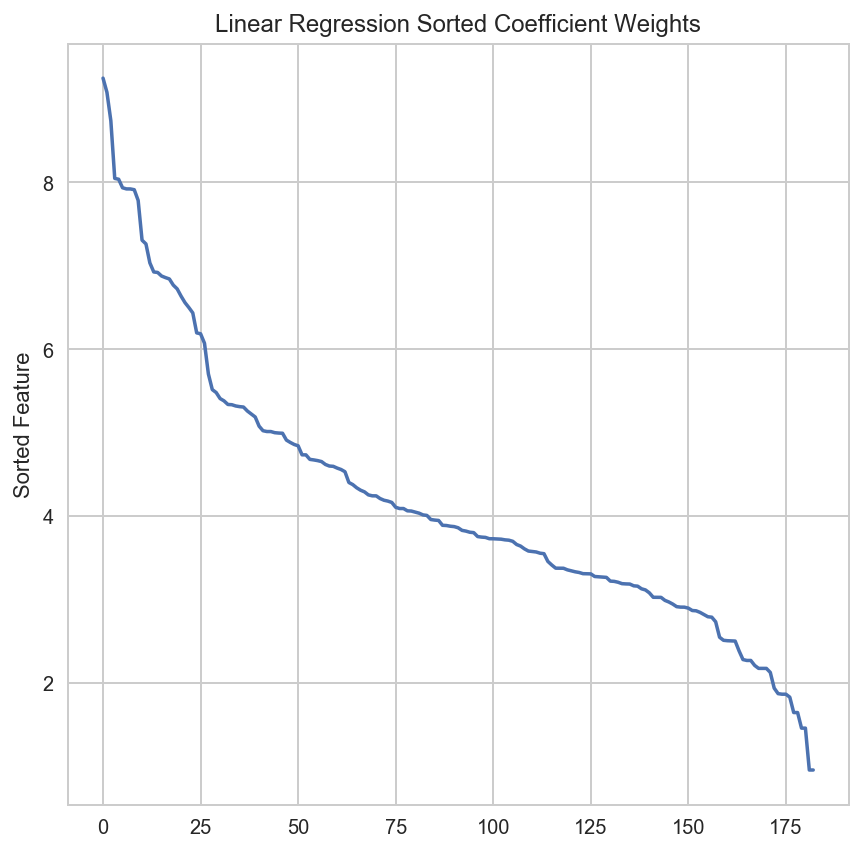

In [775]:
plt.figure(figsize=(7,7))
plt.plot(sorted(coef_total,reverse=True))

plt.title("Linear Regression Sorted Coefficient Weights")
plt.ylabel("Standardized Coefficient")
plt.ylabel("Sorted Feature")
plt.savefig("Coef_Weights_LR.png",transparent=True)

In [455]:
#same thing for random forrest

acc_list = []
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    RFmodel = RandomForestClassifier(n_estimators=150,n_jobs=-1)
    RFmodel.fit(X_train,y_train)
    predict = RFmodel.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
print(np.mean(acc_list), np.std(acc_list))#, LRmodel.coef_

guesture_number = 1 - 1
report = list(zip(X.columns,LRmodel.coef_[guesture_number]))  # importances FOR gesture 1 only

order_indexes = np.argsort(np.abs(LRmodel.coef_[guesture_number]))
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])
#sorted_report

# combined coefficent total to find the most important variables, and any irrelevant ones
coef_total = 0
for gesture in range(len(y.unique())):
    coef_total += np.abs(LRmodel.coef_[gesture])
    
report = list(zip(X.columns,coef_total))  # importances FOR gesture 1 only

order_indexes = np.argsort(np.abs(coef_total))
              
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])

sorted_report

0.976639344262 0.00357286798651


[('jerk0_mean', 9.2482950599025777),
 ('jerk0_max', 9.0782479793281023),
 ('Macc_min', 8.7374201887424459),
 ('Mjerk_max', 8.0469041302154842),
 ('dim1-coef5', 8.0367645314525671),
 ('jerk1_min', 7.9348259840513924),
 ('jerk1_mean', 7.9210692146728672),
 ('y_mean', 7.9207292312337758),
 ('dim0-coef5', 7.9114550919821038),
 ('jerk0_min', 7.7830142417401502),
 ('vel_g0_range', 7.3063787370324276),
 ('dim1-coef9', 7.2616960562797885),
 ('dim1-coef4', 7.0345486947206179),
 ('Mdist_min', 6.9260089654158437),
 ('Mvel_range', 6.919630614524424),
 ('vel_g1_upturns', 6.8772043786943007),
 ('Mvel_max', 6.8581360145538639),
 ('jerk1_max', 6.8419024269352136),
 ('time_range', 6.7685924547449412),
 ('x_min', 6.7229829357811655),
 ('Macc_max', 6.636212786147464),
 ('jerk2_min', 6.5585830466228758),
 ('y_min', 6.4993095465159012),
 ('x_mean', 6.4349973847620925),
 ('x_downcross', 6.1958816922269886),
 ('acc_g0_downcross', 6.1849670671022139),
 ('dim1-coef3', 6.0715828036373756),
 ('dim0-coef6', 5.703

## Take aways:
### Last used features:


In [ ]:
#Use the coefficients to deterimine good and poor features...

### Logistic Regression did pretty well
## will now try a battery of models, using their default parameters:

In [456]:
def ModelIt(LearningAlgorithm,X,y,N_times = 12,multi=False):
    acc_list = []
    LL_list = []
    for i in range(N_times):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
        if multi == True: model = LearningAlgorithm(n_jobs=-1)
        else: model = LearningAlgorithm()
        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        #predict_prob = model.predict_proba(X_test)
        acc = accuracy(predict,y_test)
        #LL = log_loss(y_test,predict_prob)
        #LL_list.append(LL)
        acc_list.append(acc)
    return np.mean(acc_list), np.std(acc_list)#,np.mean(LL_list), np.std(LL_list)

In [457]:
ModelIt(KNeighborsClassifier,X,y,multi=True)

(0.9567332309267792, 0.0057075004632892914)

In [458]:
ModelIt(LogisticRegression,X,y,multi=True)

(0.9709421402969789, 0.0063477093027226985)

In [459]:
ModelIt(SVC,X,y)

(0.97094214029697901, 0.0048760872900002472)

In [460]:
ModelIt(RandomForestClassifier,X,y,multi=True)

(0.94841269841269826, 0.0058646754679750664)

In [461]:
#ModelIt(GradientBoostingClassifier,X,y,N_times=5,multi=False)  #this one has to run in series, and is VERY slow

### OR, using the built in Cross_val_score:

In [602]:
model = KNeighborsClassifier(n_neighbors=5)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.94986033321517205, 0.0066507580293853783) Individual scores: [ 0.95391705  0.95846154  0.95230769  0.94461538  0.94      ]
(Accuracy Cross_Val_Score,Standard Deviation) = (0.41291058471337239, 0.085879715013581395) Individual scores: [-0.47205276 -0.31914078 -0.31233093 -0.42889408 -0.53213438]


In [603]:
model = LogisticRegression(C=1.15)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.96708779392650368, 0.0071860463653587673) Individual scores: [ 0.96466974  0.96        0.98        0.96153846  0.96923077]
(Accuracy Cross_Val_Score,Standard Deviation) = (0.22281453180265509, 0.018630850181213385) Individual scores: [-0.21833679 -0.24335156 -0.19918133 -0.2453966  -0.20780637]


In [604]:
model = SVC(kernel='linear',probability=True,C=0.01176)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.96308779392650357, 0.006156601656322213) Individual scores: [ 0.96466974  0.95538462  0.96153846  0.97384615  0.96      ]
(Accuracy Cross_Val_Score,Standard Deviation) = (0.18081541968490919, 0.0081016671583881636) Individual scores: [-0.16862953 -0.18326258 -0.19185755 -0.17511781 -0.18520963]


In [605]:
model = SVC(kernel='rbf',probability=True,C=4)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.97447051872858326, 0.0057176396539404444) Individual scores: [ 0.97081413  0.97384615  0.98461538  0.97538462  0.96769231]
(Accuracy Cross_Val_Score,Standard Deviation) = (0.1542820594500276, 0.013211320351770153) Individual scores: [-0.1615123  -0.15658    -0.13400252 -0.14650322 -0.17281225]


In [606]:
model = LinearSVC(C=0.715)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
#scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
#print("Log-Loss Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.96062625546496516, 0.01095195999188303) Individual scores: [ 0.96466974  0.94769231  0.97384615  0.96923077  0.94769231]


In [819]:
model = RandomForestClassifier(n_estimators=750)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.98154082476663118, 0.007087202369858504) Individual scores: [ 0.99231951  0.98461538  0.97230769  0.98307692  0.97538462]
(Log-Loss Cross_Val_Score,Standard Deviation) = (0.30689991573917436, 0.015889727589520508) Individual scores: [-0.28357451 -0.3013328  -0.30499976 -0.33253454 -0.31205797]


In [612]:
model = GradientBoostingClassifier(learning_rate=0.019,n_estimators=600,max_depth=4)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("(Accuracy Cross_Val_Score,Standard Deviation) =",(np.mean(scores),np.std(scores)),"Individual scores:",scores,)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1,scoring='neg_log_loss')
print("(Log-Loss Cross_Val_Score,Standard Deviation) =",(-np.mean(scores),np.std(scores)),"Individual scores:",scores,)

(Accuracy Cross_Val_Score,Standard Deviation) = (0.95878199220134697, 0.006627351832402175) Individual scores: [ 0.95852535  0.94615385  0.96461538  0.96307692  0.96153846]
(Accuracy Cross_Val_Score,Standard Deviation) = (0.16237771675020671, 0.03029856760469498) Individual scores: [-0.16673469 -0.21584899 -0.12486331 -0.14521369 -0.1592279 ]


## Use GridSearch to optimize the above algorithms

In [587]:
parameters = {'max_depth':[4],
              'learning_rate':[0.03],
              'n_estimators':[600]}
print(parameters)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, parameters, cv=shufflekfold,n_jobs=-1, verbose=1)   #note n_jobs = -2 means all but one core
#grid_search.fit(X_train,y_train)
grid_search.fit(X,y)
grid_search.best_estimator_

{'max_depth': [4, 5, 6], 'learning_rate': [0.03], 'n_estimators': [600]}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.0min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=600, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [ ]:
np.geomspace(0.01,0.015,11)

### Now, without looking at the same user:

In [469]:
def ModelIt_Groups(LearningAlgorithmSTRING,X,y,groups = 8):
    acc_list = []
    LL_list = []
    new_user = GroupKFold(groups)
    new_user.get_n_splits(X, y, df['user'])
    for train_index, test_index in new_user.split(X, y, df['user']):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        #print(len(y_test))
        model = LearningAlgorithmSTRING

        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        #predict_prob = model.predict_proba(X_test)
        
        acc = accuracy(predict,y_test)
        #LL = log_loss(y_test,predict_prob)
        #LL_list.append(LL)
        acc_list.append(acc)
    return np.mean(acc_list), np.std(acc_list)#,np.mean(LL_list), np.std(LL_list)#,acc_list

def ModelIt_Groups_LL(LearningAlgorithmSTRING,X,y,groups = 8):
    acc_list = []
    LL_list = []
    new_user = GroupKFold(groups)
    new_user.get_n_splits(X, y, df['user'])
    for train_index, test_index in new_user.split(X, y, df['user']):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        #print(len(y_test))
        model = LearningAlgorithmSTRING

        model.fit(X_train,y_train)
        #predict = model.predict(X_test)
        predict_prob = model.predict_proba(X_test)
        
        #acc = accuracy(predict,y_test)
        LL = log_loss(y_test,predict_prob)
        LL_list.append(LL)
        #acc_list.append(acc)
    return np.mean(LL_list), np.std(LL_list)#,acc_list

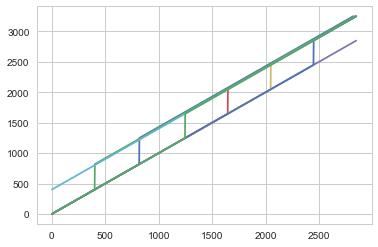

In [470]:
#confirming groups are being selected properly
new_user = GroupKFold(8)
new_user.get_n_splits(X, y, df['user'])
for train_index, test_index in new_user.split(X, y, df['user']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    plt.plot(sorted(train_index))
    #plt.plot(sorted(test_index))

In [811]:
ModelIt_Groups(KNeighborsClassifier(n_neighbors=5,n_jobs=-1),X,y)

(0.79737921172248483, 0.050705823370305138)

In [812]:
ModelIt_Groups_LL(KNeighborsClassifier(n_neighbors=5,n_jobs=-1),X,y)

(2.4003215675341747, 0.88638415194919729)

In [561]:
ModelIt_Groups(LogisticRegression(C=0.3,n_jobs=-1),X,y)

(0.86344279093984277, 0.042336544459753607)

In [562]:
ModelIt_Groups_LL(LogisticRegression(C=0.3,n_jobs=-1),X,y)

(0.68464691242102726, 0.12213866200609753)

In [565]:
ModelIt_Groups(SVC(kernel='linear',C=0.01,probability=True),X,y)

(0.87695393562335888, 0.043057154016082518)

In [566]:
ModelIt_Groups_LL(SVC(kernel='linear',C=0.01,probability=True),X,y)

(0.44089015160811768, 0.14391361384111731)

In [542]:
ModelIt_Groups(SVC(kernel='rbf',C=2.25,probability=True),X,y)

(0.87392480722833088, 0.041029093871839457)

In [554]:
ModelIt_Groups_LL(SVC(kernel='rbf',C=2.25,probability=True),X,y)

(0.49226516617371224, 0.14671777433081537)

In [553]:
ModelIt_Groups(RandomForestClassifier(n_estimators=750,n_jobs=-1),X,y)

(0.87150850023623305, 0.062211341107501629)

In [552]:
ModelIt_Groups_LL(RandomForestClassifier(n_estimators=750,n_jobs=-1),X,y)

(0.70709358635256425, 0.16242483482985481)

In [813]:
ModelIt_Groups(GradientBoostingClassifier(learning_rate=0.019,n_estimators=600,max_depth=4),X,y)  #this one has to run in series, and is VERY slow

(0.78969273474213586, 0.062297432199416969)

In [814]:
ModelIt_Groups_LL(GradientBoostingClassifier(learning_rate=0.019,n_estimators=600,max_depth=4),X,y)  #this one has to run in series, and is VERY slow

(0.76545602544355174, 0.24858500437949219)

## Optimized the above algorithms using GridSearch

In [820]:
parameters = {'n_estimators':[50,250,750]}
print(parameters)
#shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
model = RandomForestClassifier()
grid_search = GridSearchCV(model, parameters, cv=GroupKFold(8),n_jobs=-1, verbose=1)   #note n_jobs = -2 means all but one core
#grid_search.fit(X_train,y_train)
grid_search.fit(X,y,df['user'])     #note groups and GroupKFold(8) above
grid_search.best_estimator_

{'n_estimators': [50, 250, 750]}
Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Ensamble Model using best models

In [647]:
def classify_from_multi_probs(probs):
    length, N_classes = probs.shape
    
    arg_list = []
    for i in range(length):
        arg_list.append( probs[i,:].argmax() + 1 )  #I have to zero class, classes start at 1
    return arg_list

In [ ]:
def ModelIt_Groups_ENSAMBLE(model_list,X,y,groups = 8):
    n=0
    acc_list = []
    LL_list = []
    acc_list2 = []
    LL_list2 = []
    new_user = GroupKFold(groups)
    new_user.get_n_splits(X, y, df['user'])
    for train_index, test_index in new_user.split(X, y, df['user']):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        ensable_prob_list = []
        if 'lr' in model_list:
            LRmodel = LogisticRegression(C=0.3,n_jobs=-1)
            LRmodel.fit(X_train,y_train)
            ensable_prob_list += [LRmodel.predict_proba(X_test)]
            
        if 'rf' in model_list:
            RFmodel = RandomForestClassifier(n_estimators=750, n_jobs=-1)
            RFmodel.fit(X_train,y_train)
            ensable_prob_list += [RFmodel.predict_proba(X_test)]

        if 'svc' in model_list:
            SVmodel = SVC(kernel='linear',C=0.01,probability=True)
            SVmodel.fit(X_train,y_train)
            ensable_prob_list += [SVmodel.predict_proba(X_test)]
        
        if 'rbf' in model_list:
            RBFmodel = SVC(kernel='rbf',C=2.25,probability=True)
            RBFmodel.fit(X_train,y_train)
            ensable_prob_list += [RBFmodel.predict_proba(X_test)]

        n+=1
        #print(len(ensable_prob_list),"models.  Fold number ",n)
        ensable_predict = sum([x*x for x in ensable_prob_list])**len(ensable_prob_list)  # combine the models
        ensable_predict2 = sum(ensable_prob_list)/len(ensable_prob_list)  # combine the models   
        
        ensable_classified = classify_from_multi_probs(ensable_predict)
        ensable_classified2 = classify_from_multi_probs(ensable_predict2)
        
        acc = accuracy(ensable_classified,y_test)
        LL = log_loss(y_test,ensable_predict)
        LL_list.append(LL)
        acc_list.append(acc)
        acc2 = accuracy(ensable_classified2,y_test)
        LL2 = log_loss(y_test,ensable_predict2)
        LL_list2.append(LL2)
        acc_list2.append(acc2)
        
    print("Geom Sum:",np.mean(acc_list), np.std(acc_list),"LL:",np.mean(LL_list), np.std(LL_list))
    print("Arth Sum:",np.mean(acc_list2), np.std(acc_list2),"LL:",np.mean(LL_list2), np.std(LL_list2))
    return 

In [877]:
ModelIt_Groups_ENSAMBLE(['rf','lr'],X,y)

Geom Sum: 0.897977690853 0.0399705075168 0.33768280066 0.15818805694
Arth Sum: 0.901374629646 0.0386762766991 0.660824905059 0.125191373128


In [880]:
ModelIt_Groups_ENSAMBLE(['rf','svc'],X,y)

Geom Sum: 0.887649215382 0.0449984424484 0.393790799425 0.217082154685
Arth Sum: 0.887065689375 0.0456422325789 0.534005382175 0.144276792526


In [881]:
ModelIt_Groups_ENSAMBLE(['rf','rbf'],X,y)

Geom Sum: 0.88804048064 0.045437622274 0.391405813847 0.221342282741
Arth Sum: 0.887447790431 0.0461703539639 0.562840094023 0.148606958788


In [882]:
ModelIt_Groups_ENSAMBLE(['lr','svc'],X,y)

Geom Sum: 0.888239633253 0.0391522371331 0.489345786839 0.20392493992
Arth Sum: 0.887309746606 0.0387556087155 0.528795216044 0.126086530227


In [883]:
ModelIt_Groups_ENSAMBLE(['lr','rbf'],X,y)

Geom Sum: 0.891633454839 0.0299020200632 0.446955566699 0.165537289102
Arth Sum: 0.892268394466 0.0307863733372 0.549290157601 0.110726796055


In [884]:
ModelIt_Groups_ENSAMBLE(['rbf','svc'],X,y)

Geom Sum: 0.883372099843 0.0404082721837 0.556128423275 0.220057043969
Arth Sum: 0.884293742828 0.0432647128757 0.447898431975 0.13542836854


In [885]:
ModelIt_Groups_ENSAMBLE(['rf','lr','svc','rbf'],X,y)

Geom Sum: 0.896302893403 0.0359296325937 0.603092989038 0.328347286033
Arth Sum: 0.897234479892 0.036198813309 0.532304120636 0.126555224946


In [886]:
ModelIt_Groups_ENSAMBLE(['rf','lr','rbf'],X,y)

Geom Sum: 0.902198418843 0.0364251265632 0.44977215186 0.243148664689
Arth Sum: 0.903741490099 0.0372228121466 0.581125876392 0.123611187859


In [887]:
ModelIt_Groups_ENSAMBLE(['rf','lr','svc'],X,y)

Geom Sum: 0.900001632653 0.0365075139961 0.476364489254 0.258646033272
Arth Sum: 0.900936794748 0.0361702820366 0.56309057375 0.128418076891


In [888]:
ModelIt_Groups_ENSAMBLE(['rf','svc','rbf'],X,y)

Geom Sum: 0.886720562559 0.0464686812944 0.553793659119 0.316902060938
Arth Sum: 0.887640047303 0.0454244551167 0.5068083785 0.143167532965


In [889]:
ModelIt_Groups_ENSAMBLE(['lr','svc','rbf'],X,y)

Geom Sum: 0.893495707277 0.0331226656211 0.612753202009 0.260812047296
Arth Sum: 0.893183207277 0.0334684362143 0.499323281992 0.120199840015


In [879]:
def ModelIt_shuffle_ENSAMBLE(model_list,X,y,N_times = 5):
    n=0
    acc_list = []
    LL_list = []
    acc_list2 = []
    LL_list2 = []
    for i in range(N_times):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
     
        ensable_prob_list = []
        if 'lr' in model_list:
            LRmodel = LogisticRegression(C=0.3,n_jobs=-1)
            LRmodel.fit(X_train,y_train)
            ensable_prob_list += [LRmodel.predict_proba(X_test)]
            
        if 'rf' in model_list:
            RFmodel = RandomForestClassifier(n_estimators=750, n_jobs=-1)
            RFmodel.fit(X_train,y_train)
            ensable_prob_list += [RFmodel.predict_proba(X_test)]

        if 'svc' in model_list:
            SVmodel = SVC(kernel='linear',C=0.01,probability=True)
            SVmodel.fit(X_train,y_train)
            ensable_prob_list += [SVmodel.predict_proba(X_test)]
        
        if 'rbf' in model_list:
            RBFmodel = SVC(kernel='rbf',C=2.25,probability=True)
            RBFmodel.fit(X_train,y_train)
            ensable_prob_list += [RBFmodel.predict_proba(X_test)]

        n+=1
        #print(len(ensable_prob_list),"models.  Fold number ",n)
        ensable_predict = sum([x*x for x in ensable_prob_list])**len(ensable_prob_list)  # combine the models
        ensable_predict2 = sum(ensable_prob_list)/len(ensable_prob_list)  # combine the models   
        
        ensable_classified = classify_from_multi_probs(ensable_predict)
        ensable_classified2 = classify_from_multi_probs(ensable_predict2)
        
        acc = accuracy(ensable_classified,y_test)
        LL = log_loss(y_test,ensable_predict)
        LL_list.append(LL)
        acc_list.append(acc)
        acc2 = accuracy(ensable_classified2,y_test)
        LL2 = log_loss(y_test,ensable_predict2)
        LL_list2.append(LL2)
        acc_list2.append(acc2)
        
    print("Geom Sum:",np.mean(acc_list), np.std(acc_list),"LL:",np.mean(LL_list), np.std(LL_list))
    print("Arth Sum:",np.mean(acc_list2), np.std(acc_list2),"LL:",np.mean(LL_list2), np.std(LL_list2))
    return 

In [890]:
ModelIt_shuffle_ENSAMBLE(['rf','lr','svc','rbf'],X,y)

Geom Sum: 0.983102918587 0.0055809223117 LL: 0.0762011063858 0.0147685476221
Arth Sum: 0.983410138249 0.00569807588049 LL: 0.222723881529 0.00697749444187


In [891]:
ModelIt_shuffle_ENSAMBLE(['rf','lr','svc'],X,y)

Geom Sum: 0.977265745008 0.00552995391705 LL: 0.104657501894 0.0267901860155
Arth Sum: 0.976344086022 0.00501060105386 LL: 0.262724984148 0.00918703519687


In [892]:
ModelIt_shuffle_ENSAMBLE(['rf','lr','rbf'],X,y)

Geom Sum: 0.975422427035 0.00363507206335 LL: 0.105453001064 0.0207984468936
Arth Sum: 0.975422427035 0.00400565431963 LL: 0.260006711497 0.00623554443486


In [893]:
#tiny Log-Loss! (is it still?)
ModelIt_shuffle_ENSAMBLE(['rf','svc','rbf'],X,y)

Geom Sum: 0.975422427035 0.00322214699899 LL: 0.0867893294662 0.0105666021983
Arth Sum: 0.975422427035 0.0025703841061 LL: 0.201397237645 0.0088412579297


In [894]:
ModelIt_shuffle_ENSAMBLE(['lr','svc','rbf'],X,y)

Geom Sum: 0.976651305684 0.00508539027872 LL: 0.133313692189 0.0522593078901
Arth Sum: 0.974807987711 0.00537414921184 LL: 0.211691619281 0.0116018355841


In [895]:
ModelIt_shuffle_ENSAMBLE(['rf','lr'],X,y)

Geom Sum: 0.977880184332 0.00383717234925 LL: 0.067012529116 0.00832679657697
Arth Sum: 0.978494623656 0.00412178429032 LL: 0.313966672222 0.00936171773124


In [896]:
ModelIt_shuffle_ENSAMBLE(['svc','rbf'],X,y)

Geom Sum: 0.974500768049 0.00451518846596 LL: 0.122744161547 0.0268784371924
Arth Sum: 0.973886328725 0.00485756937046 LL: 0.154794060324 0.0115933143807


In [897]:
ModelIt_shuffle_ENSAMBLE(['lr','svc'],X,y)

Geom Sum: 0.969892473118 0.00501060105386 LL: 0.113956203119 0.0201218071476
Arth Sum: 0.969585253456 0.00561464420353 LL: 0.250304059575 0.00699934934399


In [898]:
ModelIt_shuffle_ENSAMBLE(['rf','rbf'],X,y)

Geom Sum: 0.980952380952 0.00724413279419 LL: 0.0664391337206 0.0288939757065
Arth Sum: 0.981259600614 0.00682829823991 LL: 0.215640595646 0.00940454017444


In [899]:
ModelIt_shuffle_ENSAMBLE(['lr','rbf'],X,y)

Geom Sum: 0.973271889401 0.00418991757204 LL: 0.097463419793 0.0269543955416
Arth Sum: 0.973886328725 0.00423473079941 LL: 0.237888947393 0.00881953116494


In [900]:
ModelIt_shuffle_ENSAMBLE(['rf','svc'],X,y)

Geom Sum: 0.975115207373 0.00544394628162 LL: 0.0755158844095 0.0122415569988
Arth Sum: 0.976036866359 0.0055469954179 LL: 0.216800382695 0.00738909292263


### Creating a composite results graph:

In [915]:
Model_names = ['KNeighborsClassifier','LogisticRegression',"SVC(kernel='linear')",
              "SVC(kernel='rbf')",'RandomForestClassifier','GradientBoostingClassifier',
             'Ensemble (LR*SVlinear)',"Ensemble (LR*RF)"]
Model_names_LL = ['KNeighborsClassifier','LogisticRegression',"SVC(kernel='linear')",
              "SVC(kernel='rbf')",'RandomForestClassifier','GradientBoostingClassifier',
             'Ensemble (LR*SVlinear)',"Ensemble (LR*RF)"]


In [921]:
Kfold_results = [(0.95416802552286428, 0.0085598005211190258),
                (0.96708779392650368, 0.0071860463653587673),
                (0.96308779392650357, 0.006156601656322213),
                (0.97447051872858326, 0.0057176396539404444),
                (0.981543187994801, 0.0059210439148464295),
                (0.95878199220134697, 0.006627351832402175),
                (0.969892473118, 0.00501060105386),
                (0.977880184332, 0.00383717234925) 
                ]
Kfold_resultsLL = [(0.41291058471337239, 0.085879715013581395),
                (0.22281453180265509, 0.018630850181213385),
                (0.18081541968490919, 0.0081016671583881636),
                (0.1542820594500276, 0.013211320351770153),
                (0.29929186283170517, 0.0087525527527885089),
                (0.16237771675020671, 0.03029856760469498),
                (0.113956203119, 0.0201218071476),
                 (0.067012529116, 0.00832679657697) ]

In [917]:
Group_results = [(0.80135487110562598, 0.054763026861536626),
                (0.86344279093984277, 0.042336544459753607),
                (0.87695393562335888, 0.043057154016082518),
                (0.87392480722833088, 0.041029093871839457),
                (0.87150850023623305, 0.062211341107501629),
                (0.7470546088872132, 0.068920931018564807),
                (0.888239633253, 0.0391522371331),
                (0.897977690853, 0.0399705075168) ]
Group_resultsLL = [(1.8427991375253261, 0.76660724454896301),
                  (0.68464691242102726, 0.12213866200609753),
                  (0.44089015160811768, 0.14391361384111731),
                  (0.49226516617371224, 0.14671777433081537),
                  (0.70709358635256425, 0.16242483482985481),
                  (0.95930042825736106, 0.271705429690692),
                  (0.489345786839, 0.20392493992),
                   (0.33768280066, 0.15818805694)]

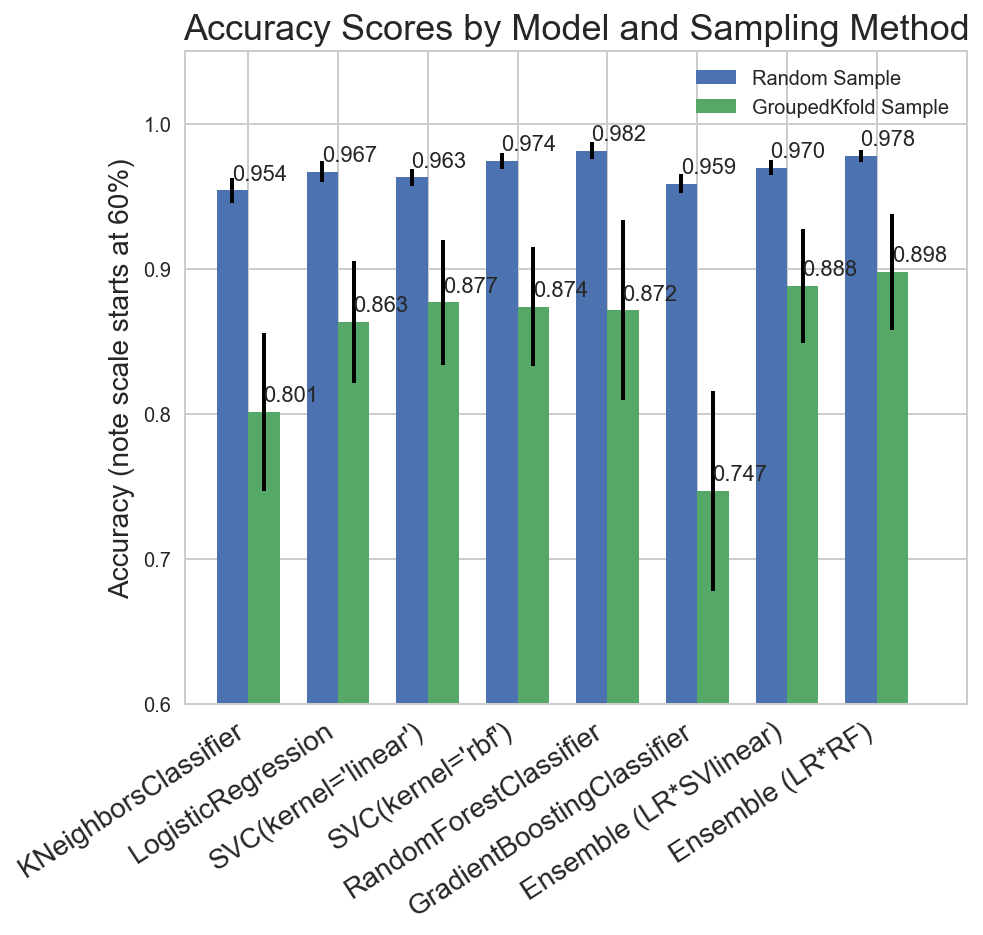

In [918]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)

## the data

set1 =      [Kfold_results[i][0] for i in range(len(Kfold_results))]
set1Std =   [Kfold_results[i][1] for i in range(len(Kfold_results))]
set2 =      [Group_results[i][0] for i in range(len(Group_results))]
set2Std =   [Group_results[i][1] for i in range(len(Group_results))]
N = len(set1)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind+0.5*width, set1, width,
                #color='black',
                yerr=set1Std,
                error_kw=dict(elinewidth=2))#,ecolor='red'))

rects2 = ax.bar(ind+1.5*width, set2, width,
                    #color='red',
                    yerr=set2Std,
                    error_kw=dict(elinewidth=2))#,ecolor='black'))



# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0.6,1.05)
ax.set_ylabel('Accuracy (note scale starts at 60%)', fontsize=14)
ax.set_title('Accuracy Scores by Model and Sampling Method', fontsize=18)
xTickMarks = Model_names
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks,ha='right')
plt.setp(xtickNames, rotation=33, fontsize=14)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Random Sample', 'GroupedKfold Sample') )


def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() +0.30+ rect.get_width()/2., label_position,
                '%.3f' % height, fontsize=11,
                ha='center', va='bottom')

autolabel(rects1, ax)
autolabel(rects2, ax)

plt.savefig("Model_Accuracy.png",transparent=True)
plt.show()

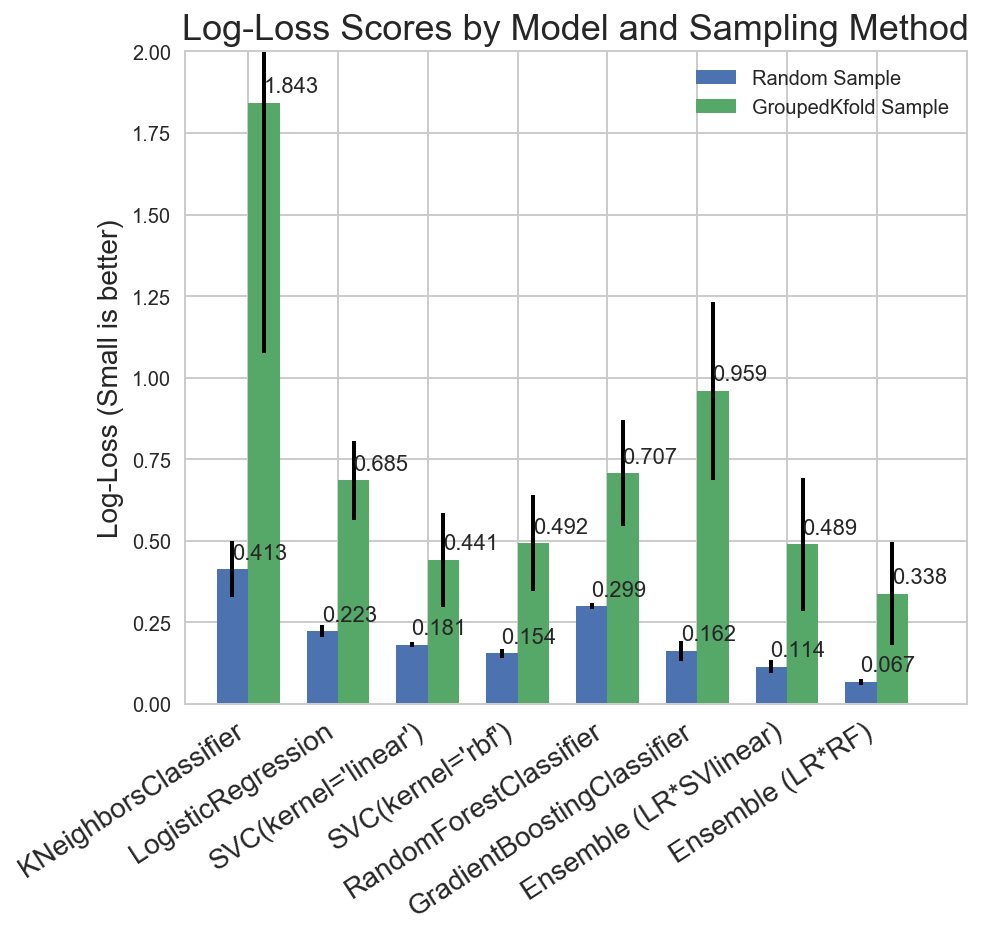

In [919]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)

## the data

set1 = [Kfold_resultsLL[i][0] for i in range(len(Kfold_resultsLL))]
set1Std =   [Kfold_resultsLL[i][1] for i in range(len(Kfold_resultsLL))]
set2 = [Group_resultsLL[i][0] for i in range(len(Group_resultsLL))]
set2Std =   [Group_resultsLL[i][1] for i in range(len(Group_resultsLL))]
N = len(set1)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind+0.5*width, set1, width,
                #color='black',
                yerr=set1Std,
                error_kw=dict(elinewidth=2))#,ecolor='red'))

rects2 = ax.bar(ind+1.5*width, set2, width,
                    #color='red',
                    yerr=set2Std,
                    error_kw=dict(elinewidth=2))#,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0.0,2.0)
ax.set_ylabel('Log-Loss (Small is better)', fontsize=14)
ax.set_title('Log-Loss Scores by Model and Sampling Method', fontsize=18)
xTickMarks = Model_names_LL
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks,ha='right')
plt.setp(xtickNames, rotation=33, fontsize=14)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Random Sample', 'GroupedKfold Sample') )

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() +0.30+ rect.get_width()/2., label_position,
                '%.3f' % height, fontsize=11,
                ha='center', va='bottom')

autolabel(rects1, ax)
autolabel(rects2, ax)

plt.savefig("Model_LogLoss.png",transparent=True)
plt.show()